### Convolution layer @ 3 + Fully connected layer @ 2

In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pylab as plt

tf.set_random_seed(777)
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


### Conv layer 1

In [3]:
# input placeholders
X = tf.placeholder(tf.float32, shape=[None, 28*28])
X_img = tf.reshape(X, (-1, 28, 28, 1))
print(X_img)
Y = tf.placeholder(tf.float32, shape=[None, 10])
keep_prob = tf.placeholder(tf.float32)

Tensor("Reshape:0", shape=(?, 28, 28, 1), dtype=float32)


In [4]:
# L1 ImgIn shape=(?, 28, 28, 1)
W1 = tf.Variable(tf.random_normal([3, 3, 1, 32], stddev=0.01))
print(W1)
L1 = tf.nn.conv2d(X_img, W1, strides=[1, 1, 1, 1], padding="SAME")
print(L1)
L1 = tf.nn.relu(L1)
L1 = tf.nn.max_pool(L1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L1)
L1 = tf.nn.dropout(L1, keep_prob=keep_prob)
print(L1)

Instructions for updating:
Colocations handled automatically by placer.
<tf.Variable 'Variable:0' shape=(3, 3, 1, 32) dtype=float32_ref>
Tensor("Conv2D:0", shape=(?, 28, 28, 32), dtype=float32)
Tensor("MaxPool:0", shape=(?, 14, 14, 32), dtype=float32)
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Tensor("dropout/mul:0", shape=(?, 14, 14, 32), dtype=float32)


### Conv layer 2

In [5]:
# L2 ImgIn shape=(?, 14, 14, 32)
W2 = tf.Variable(tf.random_normal([3, 3, 32, 64], stddev=0.01))
print(W2)
L2 = tf.nn.conv2d(L1, W2, strides=[1, 1, 1, 1], padding="SAME")
print(L2)
L2 = tf.nn.relu(L2)
L2 = tf.nn.max_pool(L2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME")
print(L2)
L2 = tf.nn.dropout(L2, keep_prob=keep_prob)
print(L2)

<tf.Variable 'Variable_1:0' shape=(3, 3, 32, 64) dtype=float32_ref>
Tensor("Conv2D_1:0", shape=(?, 14, 14, 64), dtype=float32)
Tensor("MaxPool_1:0", shape=(?, 7, 7, 64), dtype=float32)
Tensor("dropout_1/mul:0", shape=(?, 7, 7, 64), dtype=float32)


### Conv layer 3

In [6]:
# L3 ImgIn shape=(?, 7, 7, 64)
W3 = tf.Variable(tf.random_normal([3, 3, 64, 128], stddev=0.01))
print(W3)
L3 = tf.nn.conv2d(L2, W3, strides=[1, 1, 1, 1], padding="SAME")  # ?, 7, 7, 128
print(L3)
L3 = tf.nn.relu(L3)
L3 = tf.nn.max_pool(L3, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="SAME") # ?, 4, 4, 128
print(L3)
L3 = tf.nn.dropout(L3, keep_prob=keep_prob)
print(L3)
L3 = tf.reshape(L3, [-1, 4*4*128])
print(L3)

<tf.Variable 'Variable_2:0' shape=(3, 3, 64, 128) dtype=float32_ref>
Tensor("Conv2D_2:0", shape=(?, 7, 7, 128), dtype=float32)
Tensor("MaxPool_2:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("dropout_2/mul:0", shape=(?, 4, 4, 128), dtype=float32)
Tensor("Reshape_1:0", shape=(?, 2048), dtype=float32)


### Fully Connected layer 1

In [7]:
# L4 ImgIn shape=(?, 2048)
W4 = tf.get_variable("W4", shape=[4*4*128, 625], initializer=tf.contrib.layers.xavier_initializer())
b4 = tf.Variable(tf.random_normal([625]))
L4 = tf.nn.relu(tf.matmul(L3, W4) + b4)
print(L4)

Tensor("Relu_3:0", shape=(?, 625), dtype=float32)


### Fully Connected layer 2

In [8]:
# L5 ImgIn shape = (?, 625)
W5 = tf.get_variable("W5", shape=[625, 10], initializer=tf.contrib.layers.xavier_initializer())
b5 = tf.Variable(tf.random_normal([10]))
hypothesis = tf.matmul(L4, W5) + b5
print(hypothesis)

Tensor("add_1:0", shape=(?, 10), dtype=float32)


In [9]:
# define cost/loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=hypothesis, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

In [10]:
# Train the model
sess = tf.Session()
sess.run(tf.global_variables_initializer())

# parameters
batch_size = 100
num_epochs = 15
num_iterations = int(mnist.train.num_examples / batch_size)

for epoch in range(num_epochs):
    avg_cost = 0
    
    for i in range(num_iterations):
        batch_xs, batch_ys = mnist.train.next_batch(batch_size)
        c, _ = sess.run([cost, optimizer], feed_dict={X: batch_xs, Y: batch_ys, keep_prob: 0.7})
        avg_cost += c / num_iterations
    
    print("Epoch:", "%04d" % (epoch + 1), "Cost:", "%.9f" % (avg_cost))

Epoch: 0001 Cost: 0.352411598
Epoch: 0002 Cost: 0.091931611
Epoch: 0003 Cost: 0.065949823
Epoch: 0004 Cost: 0.053703352
Epoch: 0005 Cost: 0.045134618
Epoch: 0006 Cost: 0.041160896
Epoch: 0007 Cost: 0.035502146
Epoch: 0008 Cost: 0.034865843
Epoch: 0009 Cost: 0.029961746
Epoch: 0010 Cost: 0.028780811
Epoch: 0011 Cost: 0.025189837
Epoch: 0012 Cost: 0.024460824
Epoch: 0013 Cost: 0.023144198
Epoch: 0014 Cost: 0.021592326
Epoch: 0015 Cost: 0.021233811


In [17]:
# compute accuracy
correct_prediction = tf.equal(tf.argmax(hypothesis, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, dtype=tf.float32))

print("Accuracy:", "%.7f" % sess.run(accuracy, feed_dict={X: mnist.test.images, Y:mnist.test.labels, keep_prob: 1}))

Accuracy: 0.9930000


In [14]:
# Get one and predict
idx = np.random.choice(mnist.test.num_examples, 1)[0]
label = tf.argmax(mnist.test.labels[idx:idx+1], 1)
prediction = tf.argmax(hypothesis, 1)
print("Label:", sess.run(label), "Prediction:", sess.run(prediction, feed_dict={X: mnist.test.images[idx:idx+1], keep_prob:1}))

Label: [5] Prediction: [5]


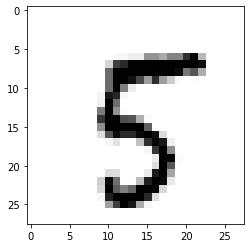

In [16]:
plt.imshow(mnist.test.images[idx:idx+1].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()